In [1]:
# ==========================
# 1️⃣ IMPORT LIBRARIES
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [12]:
# ==========================
# 2️⃣ LOAD DATA
# ==========================
df = pd.read_csv("data/IMDb_Movies_India.csv", encoding="latin1")

print("Dataset shape:", df.shape)
print(df.head())
print(df.info())

Dataset shape: (15509, 10)
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  

In [13]:
# ==========================
# 3️⃣ CLEAN DATA
# ==========================

# Drop rows where Rating is missing
df = df.dropna(subset=['Rating'])

# Convert Votes to numeric (remove commas)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Convert Duration to numeric (e.g. '120 min' -> 120)
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64


In [14]:
# ==========================
# 4️⃣ FEATURE ENCODING
# ==========================

# Fill missing categorical values
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna("Unknown")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)


Encoded dataset shape: (7919, 12064)


In [15]:
# ==========================
# 5️⃣ TRAIN-TEST SPLIT
# ==========================

X = df_encoded.drop(columns=['Name', 'Rating', 'Year'])
y = df_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 6335
Testing samples: 1584


In [16]:
# ==========================
# 6️⃣ TRAIN MODEL
# ==========================

model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Mean Squared Error: 1.495741708461781
R² Score: 0.19546802680244757


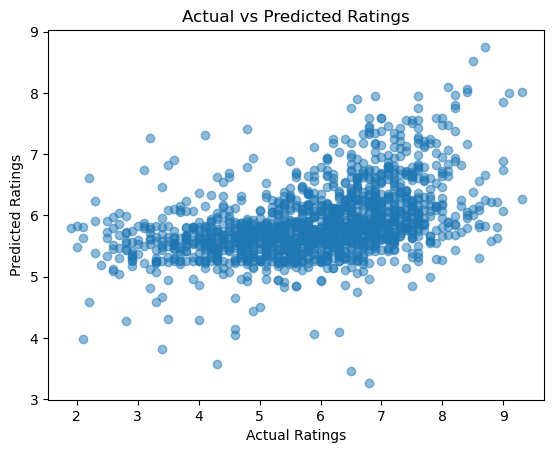

In [17]:
# ==========================
# 7️⃣ EVALUATE MODEL
# ==========================

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()
